# Titanic: Machine Learning from Disaster -3
目标：利用给定数据，预测是否 Survived

参考：https://www.kaggle.com/startupsci/titanic-data-science-solutions

## 使用模型及提交后得分
- `LogisticRegression`：0.76555
- `SVC`：0.77990
- `LinearSVC`：0.76555
- `KNeighborsClassifier`：0.77033
- `GaussianNB`：0.74163
- `Perceptron`：0.75598
- `SGDClassifier`：0.79426
- `DecisionTreeClassifier`：0.78469
- `RandomForestClassifier`：0.77990
- `GradientBoostingClassifier`：0.79426


# 加载数据

In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

combine=[train_df,test_df]
len(combine)

2

# 探索数据
## 整体情况

In [3]:
# 查看有哪些 features
print train_df.columns.values

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# 查看数据，哪些数据是数字，哪些数据是字符串，哪些数据是混合类型，哪些数据包含NAN
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# 查看 features 数据类型
train_df.info()
print '-'*40
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

## 数值特征分布

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 分类特征分布

In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


## Pclass

In [9]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Sex

In [10]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


## SibSp

In [11]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


## Parch

In [12]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


# 通过可视化数据进行分析

我们首先了解数值型特征与 Survived 之间的相关性。
直方图可用于分析连续数值变量，如年龄，其中条带或范围将有助于识别有用的模式。 

## Age-Survived

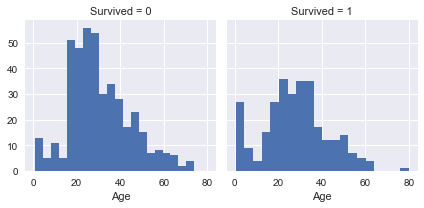

In [13]:
g=sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

从上图可以看出：
1. 婴儿幸存率高
2. 大多数乘客是青年，青年大多没有幸存
3. 最大岁数的乘客幸存了

## Age-Pclass-Survived

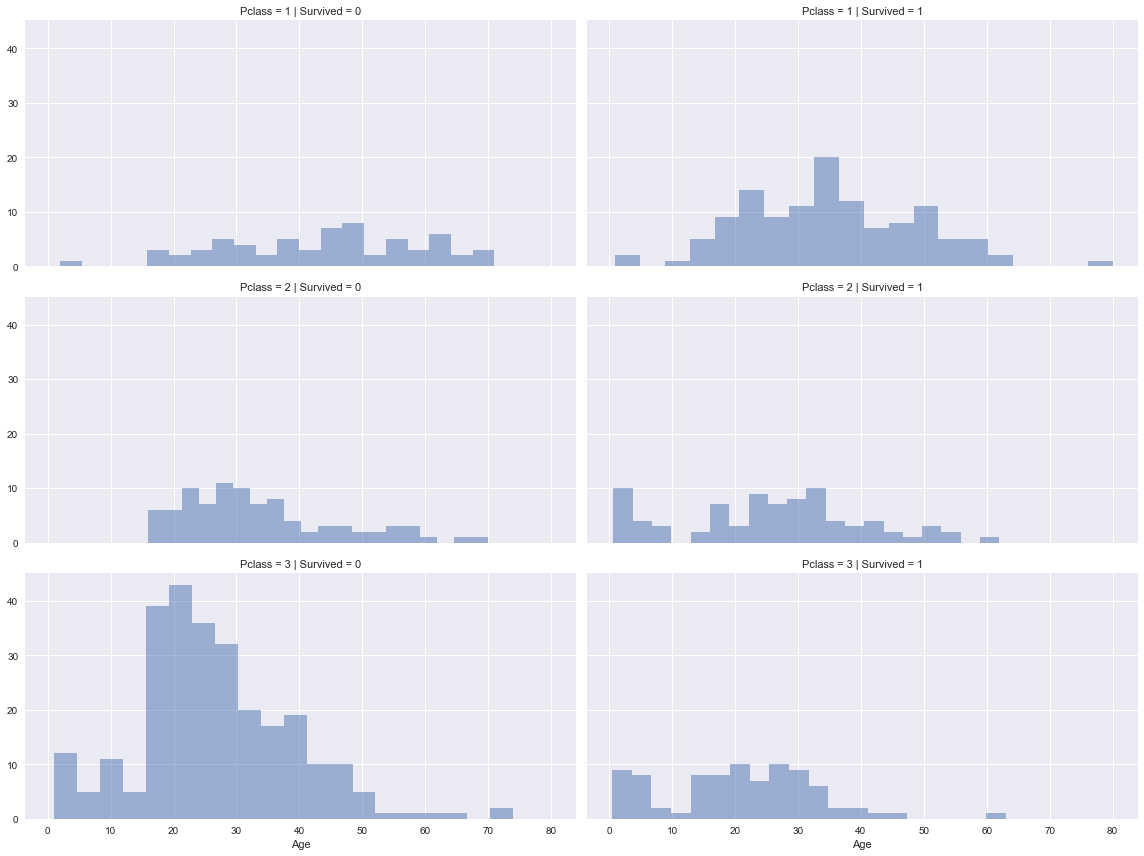

In [14]:
grid=sns.FacetGrid(train_df,col='Survived',row='Pclass',size=4,aspect=2)
grid.map(plt.hist,'Age',alpha=.5,bins=20) #alpha透明度

从上图可以看出：
1. pclass=1 的乘客大多幸存了
2. pclass=2 和 pclass=3 的多数婴儿幸存了
3. pclass=3 有大多数乘客，但是大多数人没有幸存。

## Embarked-Sex-Pclass-Survived

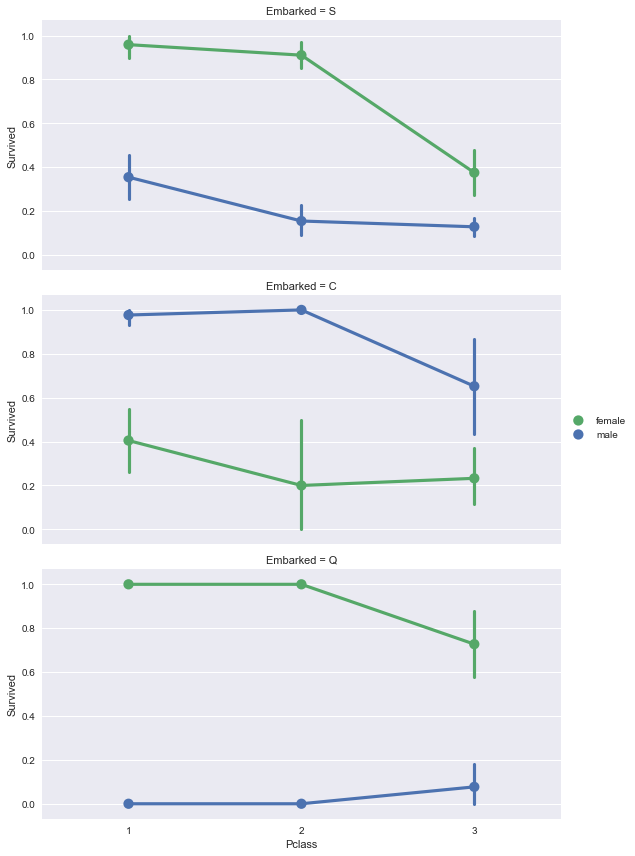

In [15]:
grid=sns.FacetGrid(train_df,row='Embarked',size=4,aspect=2)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')#palette颜色：深
grid.add_legend() #加说明：每个颜色对应什么

从上图可以看出：
1. 女性乘客的幸存率更高
2. 当 Embarked=C 时，男性乘客的幸存率更高
3. 当 Embarked=C 和 Embarked=Q 时，男性在 Pclass=3 时比 Pclass=2 是有更高的幸存率

## Embarked-Sex-Fare-Survived

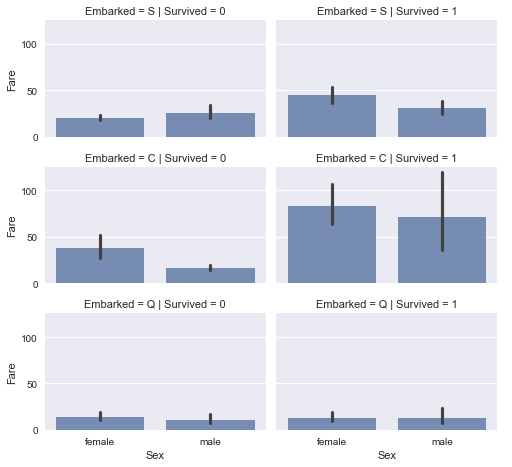

In [16]:
grid=sns.FacetGrid(train_df,row='Embarked',col='Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=.8)
grid.add_legend()

从上图可以看出：
1. 较高 Fare 的乘客有更好的生存
2. 登船口与生存率相关

In [17]:
# 删除 Ticket 和 Cabin 列
print "Before",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape

train_df.drop(['Ticket','Cabin'],axis=1,inplace=True) #这种写法必须有inplace=True
test_df.drop(['Ticket','Cabin'],axis=1,inplace=True)
combine=[train_df,test_df]

print "After",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


# 特征工程
## 创建Title

In [18]:
# 提取 Title，打印 Title 和 Sex 的关系
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)

pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
# 用常见的 Title 替换不常见的，或者将不常见的放在”Rare“类中
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'],'Rare')
    
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')

train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()  

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [20]:
# 检查一下
print len(train_df['Title']), len(test_df['Title'])

891 418


In [21]:
# 将 Title 的类别转为数值
title_mapping={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [22]:
# 完成了 Title 这个 feature，也就不再需要 Name 了，同时，PassengerId也可以删掉
train_df.drop(['Name','PassengerId'],axis=1,inplace=True)
test_df.drop(['Name'],axis=1,inplace=True)
combine=[train_df,test_df]
train_df.shape,test_df.shape

((891, 9), (418, 9))

In [23]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


## Sex

In [24]:
for dataset in combine:
    dataset['Sex']=dataset['Sex'].map({'female':1,'male':0})
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


## Age
可以将缺失的年龄填充为平均值，或者是根据平均值和偏差来随机生成。但是这样产生的年龄数据偏差比较大。
所以在这里我们分析年龄和 Pclass 以及 Sex 之间的关系。

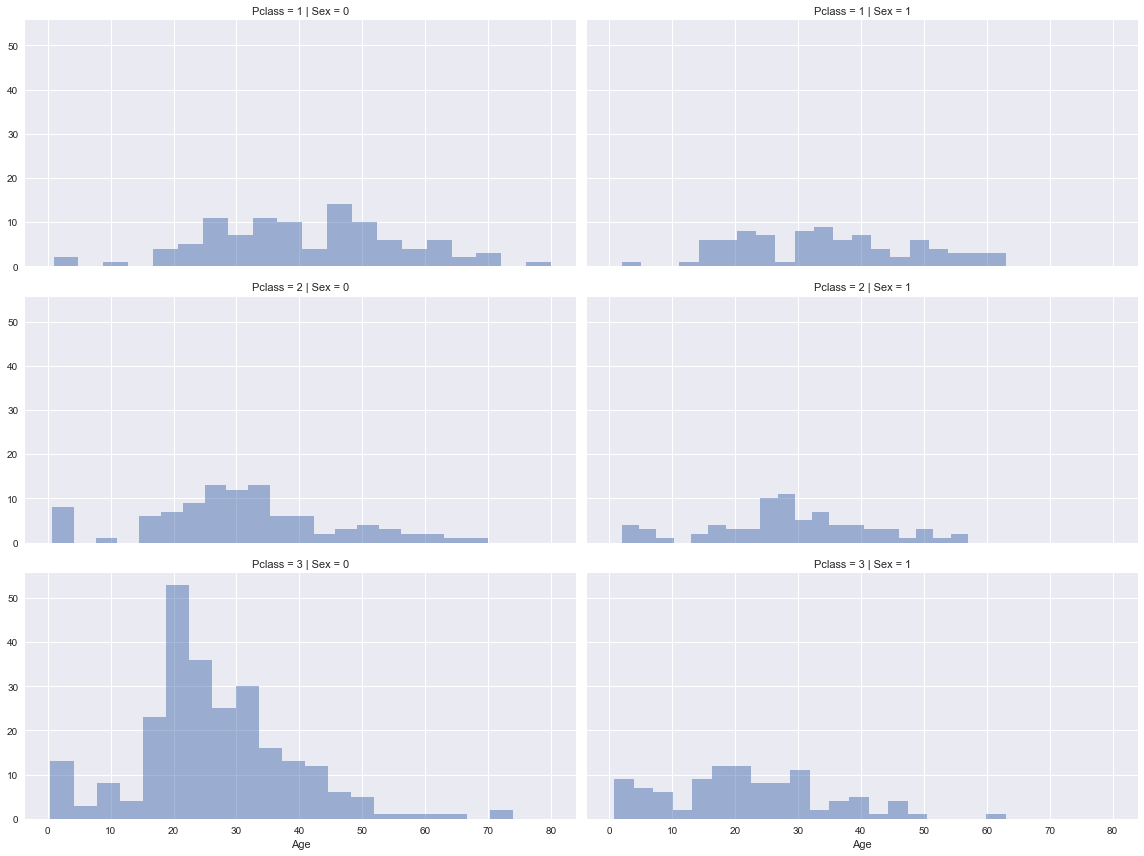

In [25]:
grid=sns.FacetGrid(train_df,row='Pclass',col='Sex',size=4,aspect=2)
grid.map(plt.hist,'Age',alpha=.5,bins=20)

In [26]:
guess_ages=np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [27]:
for dataset in combine:
    #分别求Sex=0,Pclass=1的众数，存到guess_ages[0][0]
    #求Sex=0,Pclass=2的众数，存到guess_ages[0][1]
    for i in range(2):
        for j in range(3):
            guess_df=dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            age_guess=guess_df.median()
            # Convert random age float to nearest .5 age
            guess_ages[i,j]=int(age_guess/0.5+0.5)*0.5
            
    for i in range(2):
        for j in range(3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex ==i) & (dataset.Pclass==j+1),'Age']=guess_ages[i,j]
    
    dataset['Age']=dataset['Age'].astype(int)
        
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [28]:
guess_ages

array([[ 42.,  28.,  24.],
       [ 41.,  24.,  22.]])

In [29]:
age_guess #这只是Sex=1,Pclass=3的众数

22.0

In [30]:
# 将年龄分组，查看与 Survived 的关系
train_df['AgeBand']=pd.cut(train_df['Age'],5) #将连续值分为5份
train_df[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean()

,AgeBand,Survived
0,"(-0.08, 16]",0.550000
1,"(16, 32]",0.337374
2,"(32, 48]",0.412037
3,"(48, 64]",0.434783
4,"(64, 80]",0.090909


In [31]:
for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']=4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16, 32]"
1,1,1,1,2,1,0,71.2833,C,3,"(32, 48]"
2,1,3,1,1,0,0,7.9250,S,2,"(16, 32]"
3,1,1,1,2,1,0,53.1000,S,3,"(32, 48]"
4,0,3,0,2,0,0,8.0500,S,1,"(32, 48]"


In [32]:
# 移除 AgeBand
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1.0
1,893,3,1,2,1,0,7.0000,S,3.0
2,894,2,0,3,0,0,9.6875,Q,1.0
3,895,3,0,1,0,0,8.6625,S,1.0
4,896,3,1,1,1,1,12.2875,S,3.0


## 创建 FamilySize

In [33]:
for dataset in combine:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1

train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


## 创建 IsAlone

In [34]:
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1
    
train_df[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [35]:
# 删除 'Parch','SibSp','FamilySize'
train_df.drop(['Parch','SibSp','FamilySize'],axis=1,inplace=True)
test_df.drop(['Parch','SibSp','FamilySize'],axis=1,inplace=True)
combine=[train_df,test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


## 创建 `Age*Class`

In [36]:
for dataset in combine:
    dataset['Age*Class']=dataset.Age*dataset.Pclass

train_df.loc[:,['Age','Pclass','Age*Class']].head(10)

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6
5,1,3,3
6,3,1,3
7,0,3,0
8,1,3,3
9,0,2,0


## Embarked

In [37]:
freq_port=train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [38]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [39]:
# 转为数值
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({'S':0,'C':1,'Q':2})
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [40]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1.0,1,6
1,893,3,1,2,7.0000,0,3.0,0,6
2,894,2,0,3,9.6875,2,1.0,1,6
3,895,3,0,1,8.6625,0,1.0,1,3
4,896,3,1,1,12.2875,0,3.0,0,3


## 创建 FareBand

In [41]:
train_df['FareBand']=pd.qcut(train_df['Fare'],4)
train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean()

,FareBand,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


In [42]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare']=dataset['Fare'].astype(int)
    
train_df.drop(['FareBand'],axis=1,inplace=True)
combine=[train_df,test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [43]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1.0,1,6
1,893,3,1,2,0,0,3.0,0,6
2,894,2,0,3,1,2,1.0,1,6
3,895,3,0,1,1,0,1.0,1,3
4,896,3,1,1,1,0,3.0,0,3
5,897,3,0,0,1,0,1.0,1,0
6,898,3,1,1,0,2,2.0,1,3
7,899,2,0,1,2,0,1.0,0,2
8,900,3,1,1,0,1,3.0,1,3
9,901,3,0,1,2,0,1.0,0,3


# 预测

In [44]:
X_train=train_df.drop('Survived',axis=1)
Y_train=train_df['Survived']
X_test=test_df.drop('PassengerId',axis=1).copy()

X_train.shape,Y_train.shape,X_test.shape

((891, 8), (891,), (418, 8))

In [45]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred1 = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.26

In [46]:
# 使用Logistic回归验证我们的假设
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.200978
5,Title,0.414362
4,Embarked,0.281026
6,IsAlone,0.262084
3,Fare,-0.022062
7,Age*Class,-0.085959
2,Age,-0.371647
0,Pclass,-1.083515


In [47]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred2 = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.5

In [48]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred3 = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.57

In [49]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred4 = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.06

In [50]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred5 = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.88

In [51]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred6 = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.79

In [52]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred7 = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.69

In [53]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred8 = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64

In [54]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred9 = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

In [55]:
# GradientBoostingClassifier

gbdt = GradientBoostingClassifier()
gbdt.fit(X_train, Y_train)
Y_pred10 = gbdt.predict(X_test)
acc_gbdt = round(gbdt.score(X_train, Y_train) * 100, 2)
acc_gbdt

84.74

In [56]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 
              'Linear SVC', 'KNN', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Decision Tree', 
              'Random Forest', 'Gradient Boosting Classifier'],
    'Score': [acc_log, acc_svc, acc_linear_svc, acc_knn, 
              acc_gaussian, acc_perceptron, acc_sgd, 
              acc_decision_tree, acc_random_forest, acc_gbdt]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Decision Tree,86.64
8,Random Forest,86.64
9,Gradient Boosting Classifier,84.74
3,KNN,84.06
1,Support Vector Machines,83.50
0,Logistic Regression,81.26
6,Stochastic Gradient Decent,79.69
2,Linear SVC,79.57
5,Perceptron,78.79
4,Naive Bayes,76.88


In [57]:
for i in range(1,11):
    pred=eval('Y_pred{}'.format(i))
    submission = pd.DataFrame({
            "PassengerId": test_df["PassengerId"],
            "Survived": pred
        })
    filename='submission4_{}.csv'.format(i)
    submission.to_csv(filename,index=False)